<a href="https://colab.research.google.com/github/Pranav4860/ES114-PSDV/blob/main/Histogram_Equalization_and_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
simg1=cv2.imread('/content/drive/MyDrive/sample_results/imageA.png',0)
simg2=cv2.imread('/content/drive/MyDrive/sample_results/imageB.png',0)
img1=cv2.imread('/content/drive/MyDrive/histogram_matching/grey_1.png',0)
img2=cv2.imread('/content/drive/MyDrive/histogram_matching/grey_2.png',0)
img3=cv2.imread('/content/drive/MyDrive/histogram_matching/grey_3.png',0)
img4=cv2.imread('/content/drive/MyDrive/histogram_matching/grey_4.png',0)
simgf1=simg1.flatten()
simgf2=simg2.flatten()
imgf1=img1.flatten()
imgf2=img2.flatten()
imgf3=img3.flatten()
imgf4=img4.flatten()


zsimg1=[0]*256
zsimg2=[0]*256
zimg1=[0]*256
zimg2=[0]*256
zimg3=[0]*256
zimg4=[0]*256
for i in simgf1:
  zsimg1[i]+=1
for i in simgf2:
  zsimg2[i]+=1
for i in imgf1:
  zimg1[i]+=1
for i in imgf2:
  zimg2[i]+=1
for i in imgf3:
  zimg3[i]+=1
for i in imgf4:
  zimg4[i]+=1



cv2.imread() reads the data and gives the intensity of each pixel in a 2-D array. .flatten() converts 2-D array to 1-D array. which i am travesing to make the  list of freq of each pixel.

For Normalized

In [ ]:
def nhist(img):
  z=[0]*256
  z1=img.flatten()
  for i in z1:
    z[i]+=1
  s=sum(z)
  for i in range(len(z)):
    z[i]/=s
  return z

hists1=nhist(simg1)
hists2=nhist(simg2)
hist1=nhist(img1)
hist2=nhist(img2)
hist3=nhist(img3)
hist4=nhist(img4)
p=range(256)

nhist function is defined to normalize the image. it takes the frequency of intensities in an image (here, z) and divides by total number of pixels to normalise it.

For Equalised

In [ ]:
def eq(z,img):
  z1=np.array(z)
  tp=sum(z)
  z1=z1/tp
  cz=np.cumsum(z1)
  cz1=np.floor(cz*255).astype(np.uint8)
  iarr=np.asarray(img)
  imgf=img.flatten()
  eql=[]
  for i in imgf:
    eql.append(cz1[i])
  eqa=np.reshape(np.asarray(eql),iarr.shape)
  zn=[0]*256
  for i in range(img.shape[1]):
    for j in range(img.shape[0]):
      x=eqa[j,i]
      zn[x]+=1
  ecdf=np.cumsum(zn)/tp
  return eqa
eqs1=eq(zsimg1,simg1)
eqs2=eq(zsimg2,simg2)
eq1=eq(zimg1,img1)
eq2=eq(zimg2,img2)
eq3=eq(zimg3,img3)
eq4=eq(zimg4,img4)
p=range(256)

In this function we are taking z, which is the frequency, and img, which is the 2-D array of intensities of pixels. Then, we are calculating the cdf of the frequency. Then, multiply it by 255(highest intensity value) and round it off. Now we get the mapping of each intensity. Each index is mapped to the value it has at that index. then we replace them in the img source code i.e. its 2-D array of intensities. and then plot the image and its histogram of frequencies of its intensities.


For Matching

In [ ]:
def matching(z1,img1,z2,img2):
  x=img1.shape[0]*img1.shape[1]
  z1=np.array(z1)
  z2=np.array(z2)
  zn1 = z1/(x)
  zn2=z2/(x)
  cdf1=np.cumsum(zn1)/sum(zn1)
  cdf2=np.cumsum(zn2)/sum(zn2)
  zf=[0]*256
  for i in range(len(cdf1)):
    d=abs(cdf1[i]-cdf2)
    ind=np.argmin(d)
    zf[i]=ind
  imf1=img1.flatten()
  upimg=[0]*(img1.shape[0]*img1.shape[1])
  for i in range(len(upimg)):
    upimg[i]=zf[imf1[i]]
  upimg=np.array(upimg)
  upimg_2d=upimg.reshape(img1.shape[0],img1.shape[1])
  return upimg_2d


sm1=matching(zsimg1,simg1,zsimg2,simg2)
m1=matching(zimg1,img1,zimg2,img2)
m2=matching(zimg4,img4,zimg3,img3)
m3=matching(zimg2,img2,zimg4,img4)
m4=matching(zimg3,img3,zimg1,img1)

in matching function I take the input as the frequency of the intensities and image pixel intensities for both images.

np.argmin gives the index of the minimum value from the list.

np.reshape converts 1-D array to 2-D array.

In this function, I am first calculating the cdf of both frequencies. Then for mapping the intensities, we are finding the difference of each cdf element of source image with all the cdf elements of target image. then, I appended the index of the min difference element from the cdf of target image to get the mapping. Now each index is mapped to its element. Then, i just replaced the intensities from the image pixel intensity array according to its mapping and converted into 2-D array as I had flattened as its more convienent to work with 1-D array. and ploted it.

#Histograms

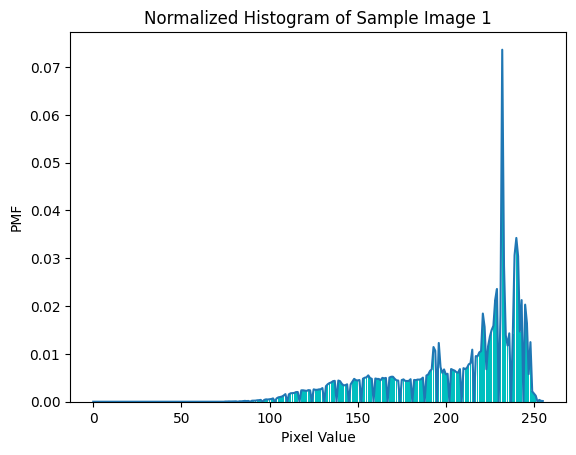

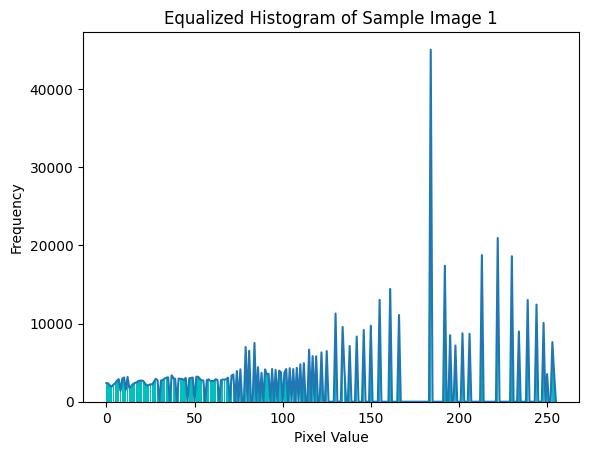

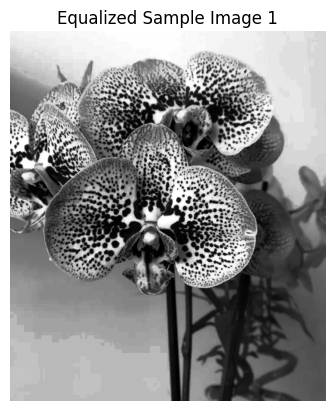

In [ ]:
#Normalised
plt.plot(p,hists1)
plt.bar(p,hists1,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('PMF')
plt.title('Normalized Histogram of Sample Image 1')
plt.show()

# Equalised
zeq=[0]*256
for i in eqs1.flatten():
  zeq[int(i)]+=1
plt.plot(p,zeq)
plt.bar(p,zeq,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Equalized Histogram of Sample Image 1')
plt.show()
plt.imshow(eqs1,cmap='gray')
plt.title("Equalized Sample Image 1")
plt.axis('off')
plt.show()


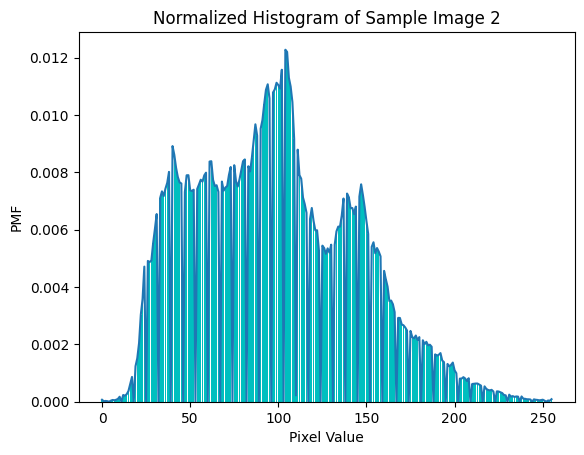

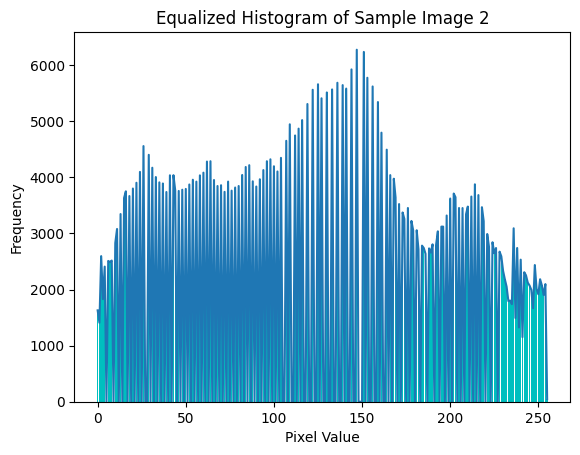

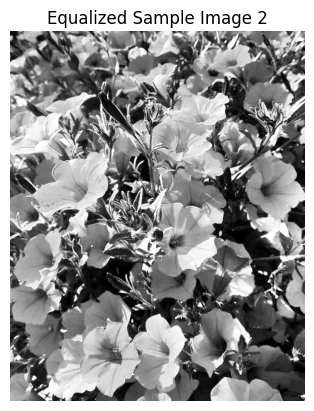

In [ ]:
#Normalised
plt.plot(p,hists2)
plt.bar(p,hists2,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('PMF')
plt.title('Normalized Histogram of Sample Image 2')
plt.show()

#Equalised
zeq=[0]*256
for i in eqs2.flatten():
  zeq[int(i)]+=1
plt.plot(p,zeq)
plt.bar(p,zeq,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Equalized Histogram of Sample Image 2')
plt.show()
plt.imshow(eqs2,cmap='gray')
plt.title("Equalized Sample Image 2")
plt.axis('off')
plt.show()


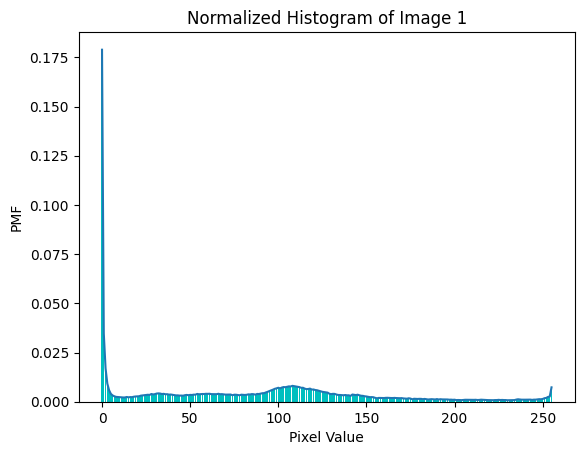

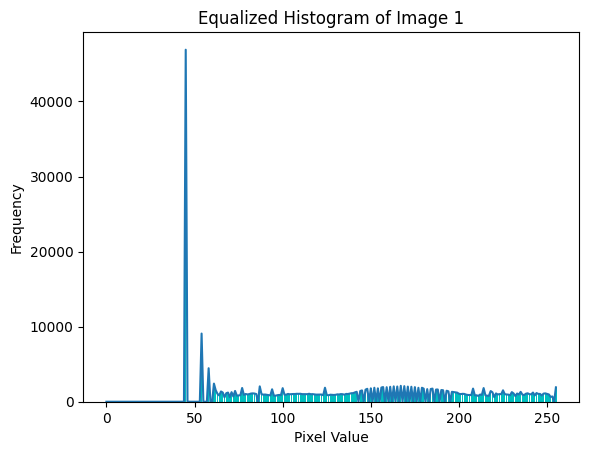

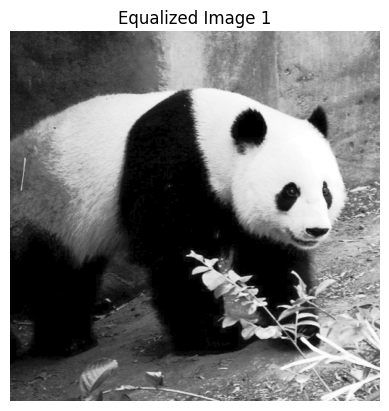

In [ ]:
#normalised
plt.plot(p,hist1)
plt.bar(p,hist1,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('PMF')
plt.title('Normalized Histogram of Image 1')
plt.show()

#Equalised
zeq=[0]*256
for i in eq1.flatten():
  zeq[int(i)]+=1
plt.plot(p,zeq)
plt.bar(p,zeq,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Equalized Histogram of Image 1')
plt.show()
plt.imshow(eq1,cmap='gray')
plt.title("Equalized Image 1")
plt.axis('off')
plt.show()

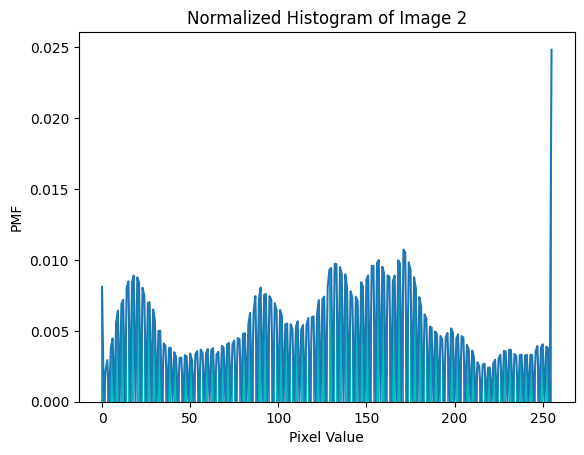

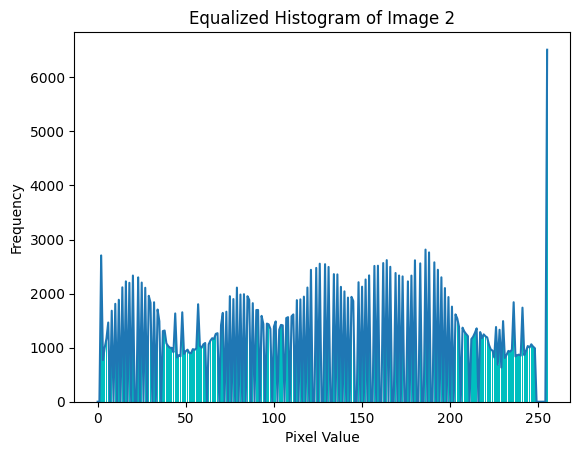

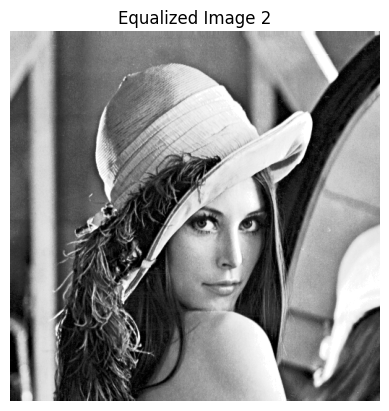

In [ ]:
#normalised
plt.plot(p,hist2)
plt.bar(p,hist2,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('PMF')
plt.title('Normalized Histogram of Image 2')
plt.show()

#equalised
zeq=[0]*256
for i in eq2.flatten():
  zeq[int(i)]+=1
plt.plot(p,zeq)
plt.bar(p,zeq,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Equalized Histogram of Image 2')
plt.show()
plt.imshow(eq2,cmap='gray')
plt.title("Equalized Image 2")
plt.axis('off')
plt.show()


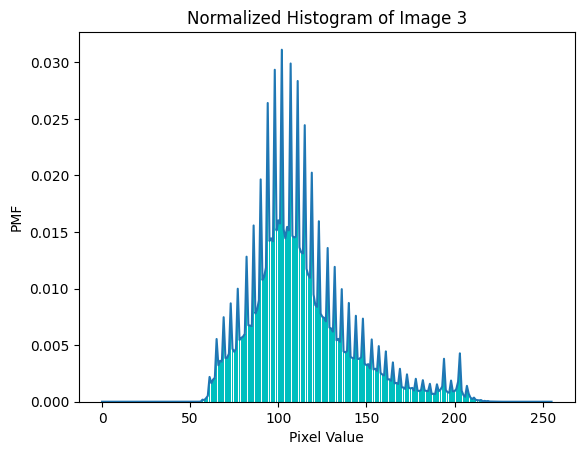

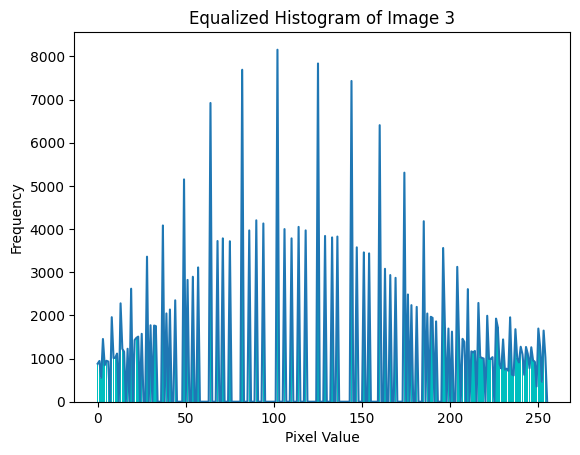

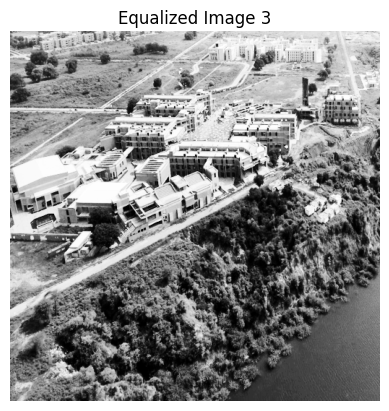

In [ ]:
#normalised
plt.plot(p,hist3)
plt.bar(p,hist3,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('PMF')
plt.title('Normalized Histogram of Image 3')
plt.show()

#equalised
zeq=[0]*256
for i in eq3.flatten():
  zeq[int(i)]+=1
plt.plot(p,zeq)
plt.bar(p,zeq,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Equalized Histogram of Image 3')
plt.show()
plt.imshow(eq3,cmap='gray')
plt.title("Equalized Image 3")
plt.axis('off')
plt.show()

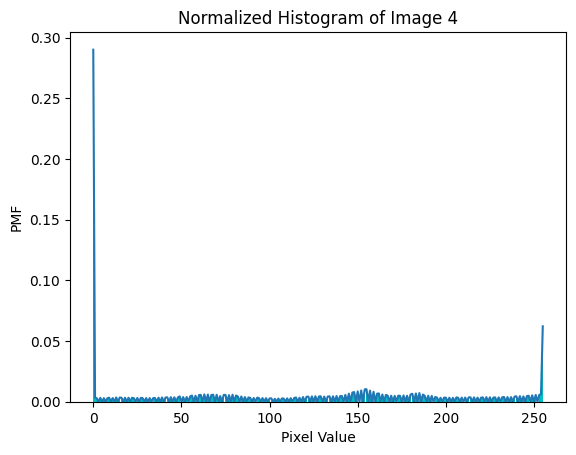

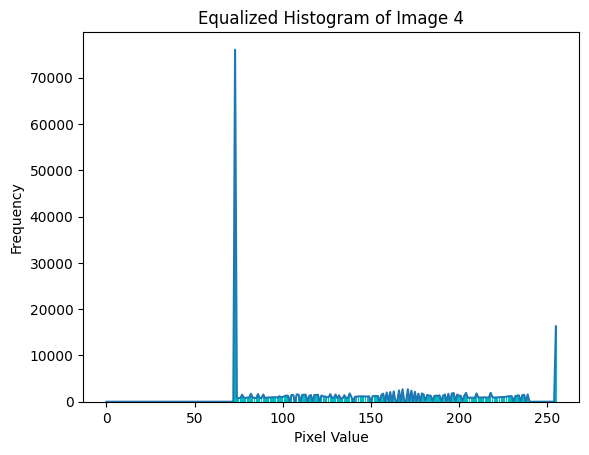

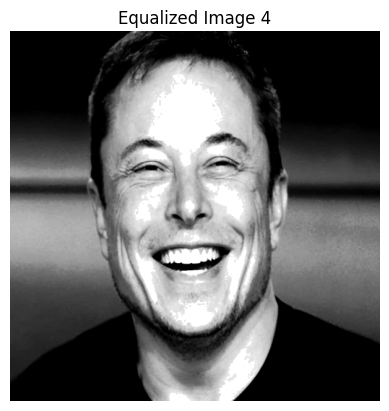

In [ ]:
#normalised
plt.plot(p,hist4)
plt.bar(p,hist4,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('PMF')
plt.title('Normalized Histogram of Image 4')
plt.show()

#equalised
zeq=[0]*256
for i in eq4.flatten():
  zeq[int(i)]+=1
plt.plot(p,zeq)
plt.bar(p,zeq,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Equalized Histogram of Image 4')
plt.show()
plt.imshow(eq4,cmap='gray')
plt.title("Equalized Image 4")
plt.axis('off')
plt.show()


#Matching

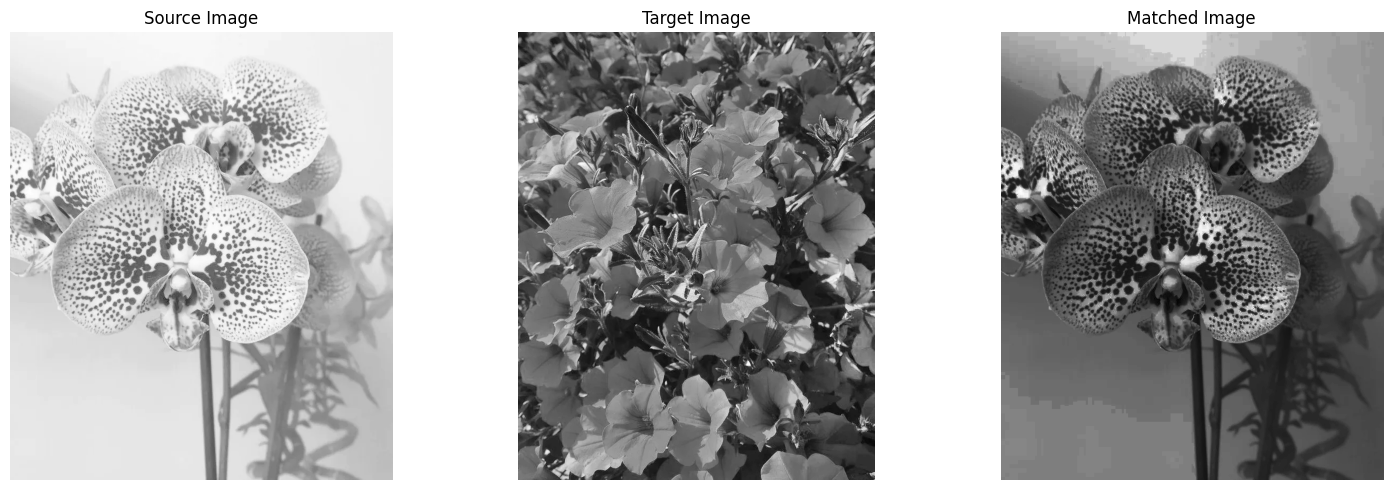

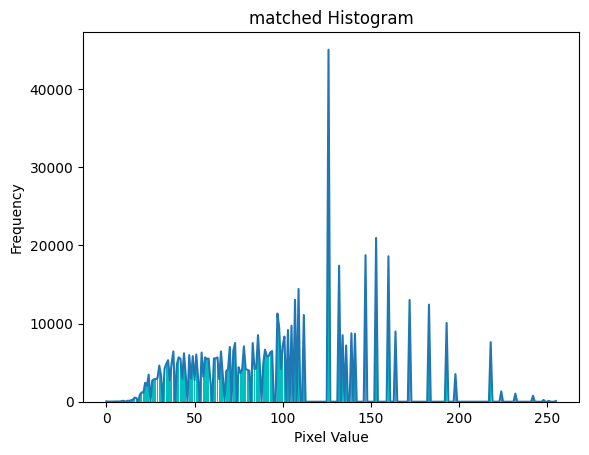

In [ ]:
zm=[0]*256
for i in sm1.flatten():
  zm[i]+=1


plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.imshow(simg1,cmap='gray')
plt.title("Source Image")
plt.axis('off')


plt.subplot(1,4,2)
plt.imshow(simg2,cmap='gray')
plt.title("Target Image")
plt.axis('off')


plt.subplot(1,4,3)
plt.imshow(sm1,cmap='gray')
plt.title("Matched Image")
plt.axis('off')
plt.tight_layout()
plt.show()


plt.plot(p,zm)
plt.bar(p,zm,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('matched Histogram')
plt.show()


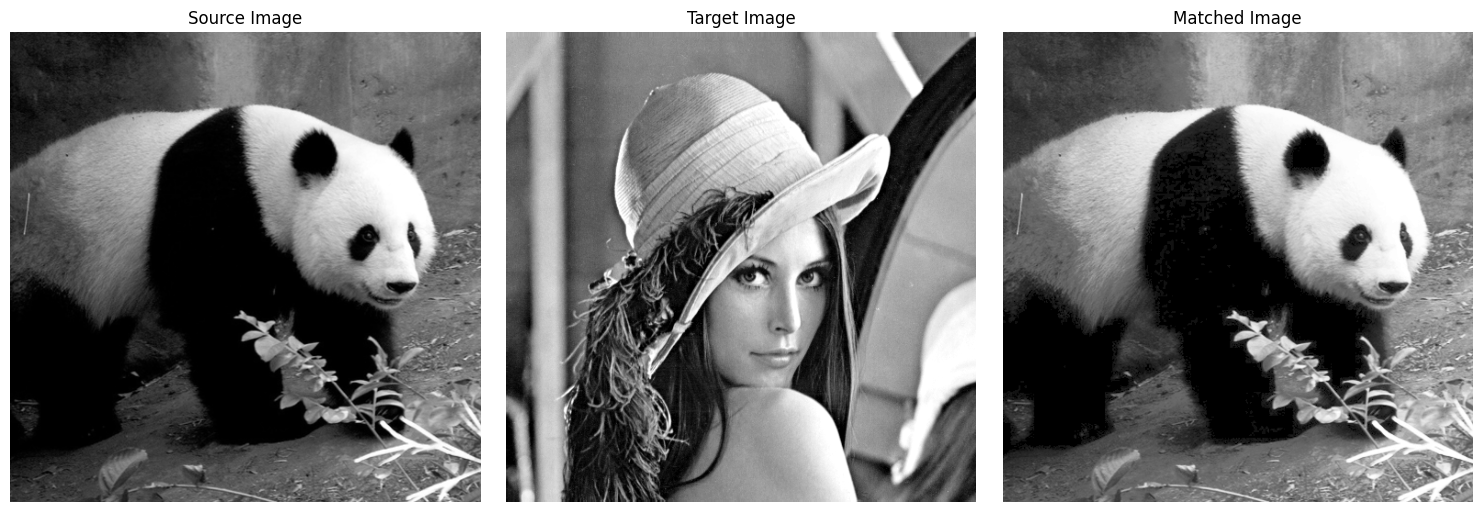

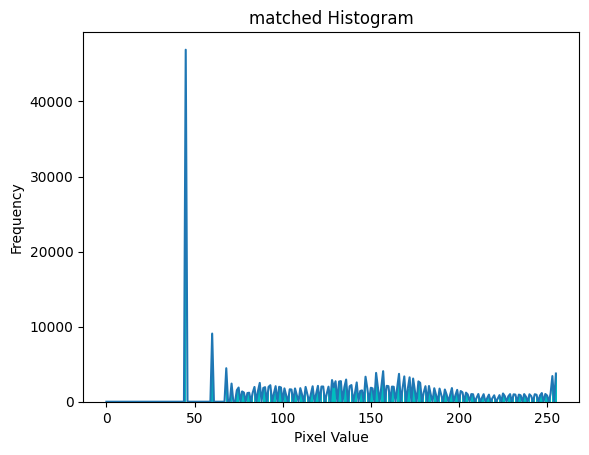

In [ ]:
zm=[0]*256
for i in m1.flatten():
  zm[i]+=1


plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.imshow(img1,cmap='gray')
plt.title("Source Image")
plt.axis('off')


plt.subplot(1,4,2)
plt.imshow(img2,cmap='gray')
plt.title("Target Image")
plt.axis('off')


plt.subplot(1,4,3)
plt.imshow(m1,cmap='gray')
plt.title("Matched Image")
plt.axis('off')
plt.tight_layout()
plt.show()


plt.plot(p,zm)
plt.bar(p,zm,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('matched Histogram')
plt.show()



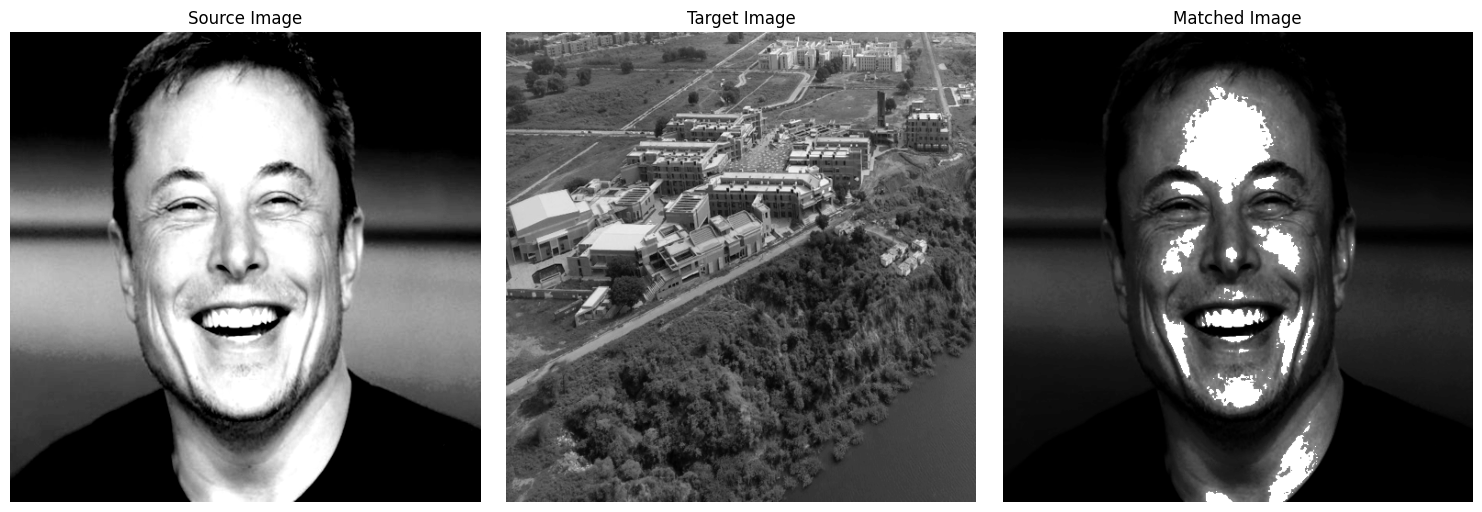

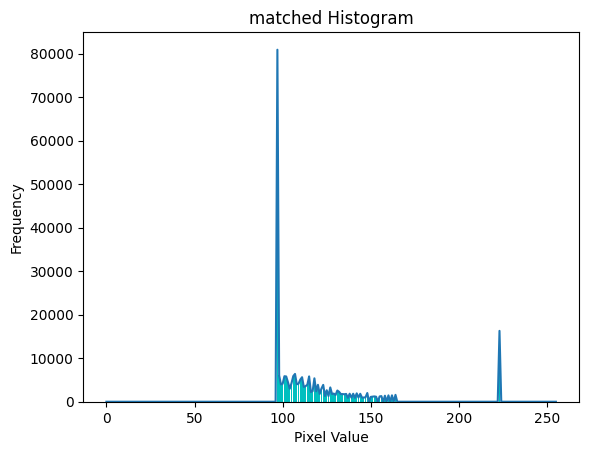

In [ ]:
zm=[0]*256
for i in m2.flatten():
  zm[i]+=1


plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.imshow(img4,cmap='gray')
plt.title("Source Image")
plt.axis('off')


plt.subplot(1,4,2)
plt.imshow(img3,cmap='gray')
plt.title("Target Image")
plt.axis('off')


plt.subplot(1,4,3)
plt.imshow(m2,cmap='gray')
plt.title("Matched Image")
plt.axis('off')
plt.tight_layout()
plt.show()


plt.plot(p,zm)
plt.bar(p,zm,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('matched Histogram')
plt.show()



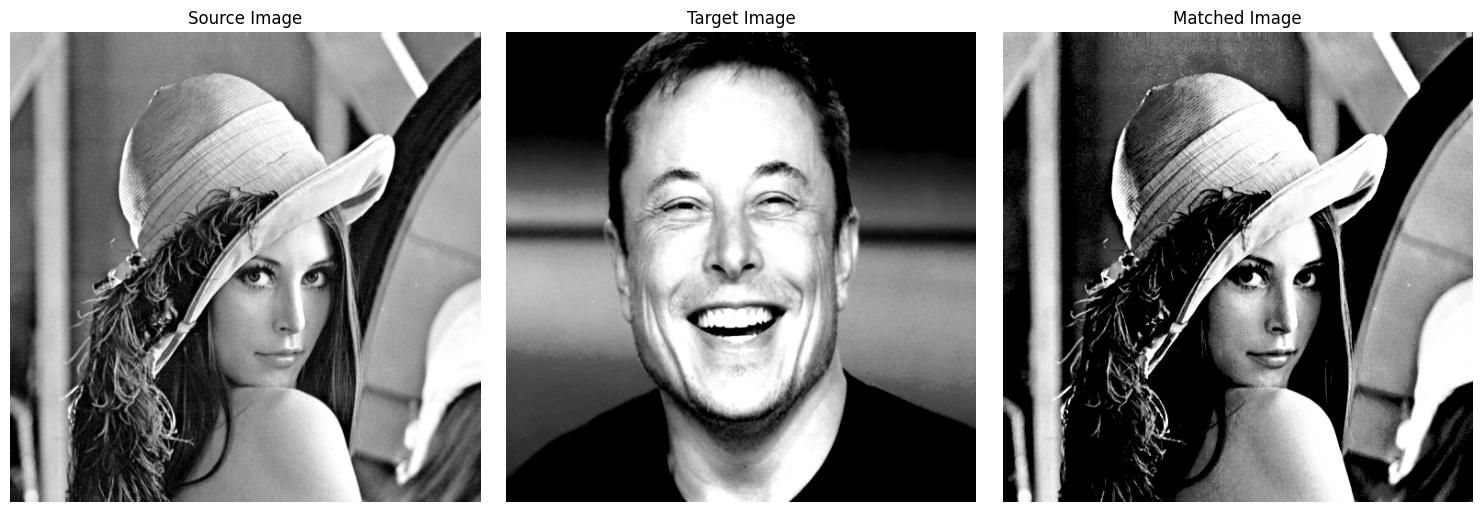

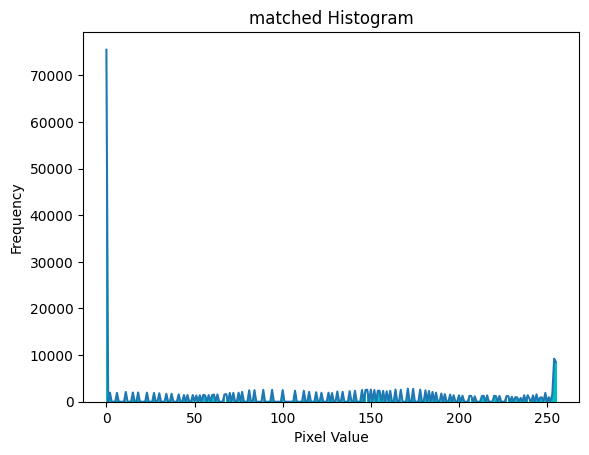

In [ ]:
zm=[0]*256
for i in m3.flatten():
  zm[i]+=1


plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.imshow(img2,cmap='gray')
plt.title("Source Image")
plt.axis('off')


plt.subplot(1,4,2)
plt.imshow(img4,cmap='gray')
plt.title("Target Image")
plt.axis('off')


plt.subplot(1,4,3)
plt.imshow(m3,cmap='gray')
plt.title("Matched Image")
plt.axis('off')
plt.tight_layout()
plt.show()


plt.plot(p,zm)
plt.bar(p,zm,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('matched Histogram')
plt.show()


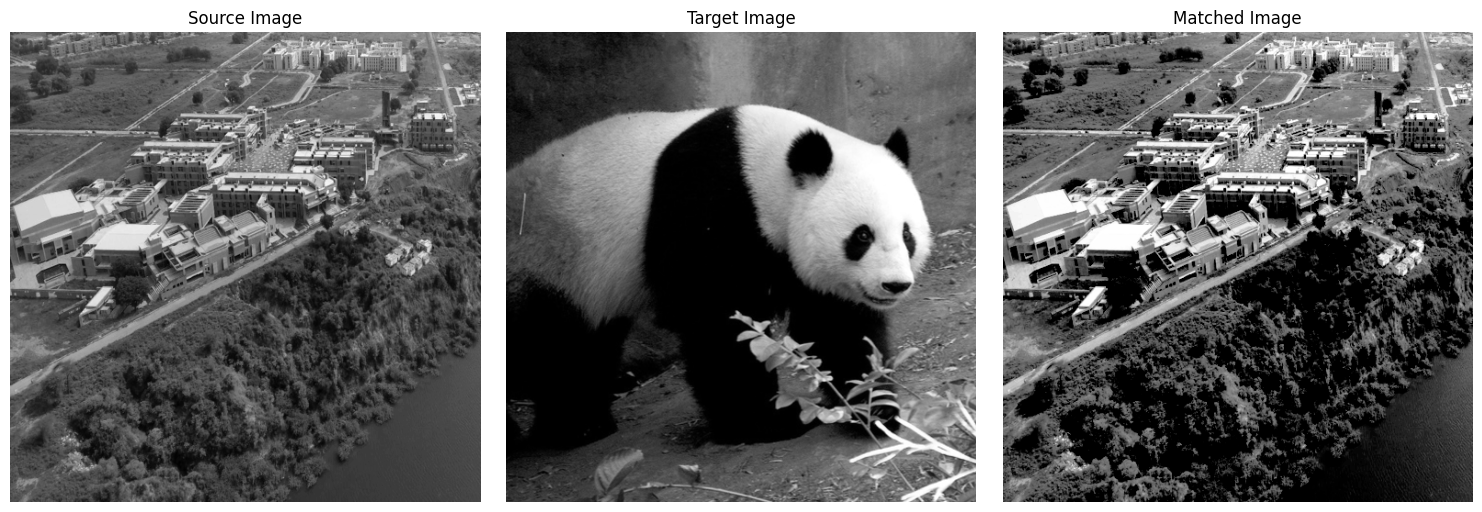

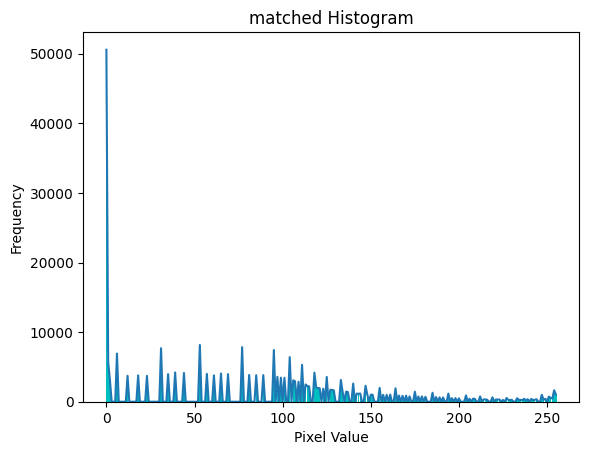

In [ ]:
zm=[0]*256
for i in m4.flatten():
  zm[i]+=1


plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
plt.imshow(img3,cmap='gray')
plt.title("Source Image")
plt.axis('off')


plt.subplot(1,4,2)
plt.imshow(img1,cmap='gray')
plt.title("Target Image")
plt.axis('off')


plt.subplot(1,4,3)
plt.imshow(m4,cmap='gray')
plt.title("Matched Image")
plt.axis('off')
plt.tight_layout()
plt.show()


plt.plot(p,zm)
plt.bar(p,zm,color='c')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('matched Histogram')
plt.show()



# References

Citations:
1. https://towardsdatascience.com/histogram-matching-ee3a67b4cbc1
2. Numpy and opencv Documentations

Peers Discussed:
1. Zainab Kapadia(23110373)
2. Nupoor Assudani (23110224)
3. Ginisha Garg (23110117)
3. Hasan Ali(23110133)
4. Harsh Jamgaonkar(23110130)